## Problem Statement

        - When the company receives a loan application, the company has to decide for loan approval based on the applicant’s     profile. Two types of risks are associated with the bank’s decision:

         1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the                  company

          2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan                    may lead to a financial loss for the company.

## Dataset explanation

1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties. 

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.


In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [132]:
pd.pandas.set_option('display.max_columns',200) # to display columns upto maximum 200
pd.set_option('display.max_rows',150)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

### Loading first dataset "application_data.csv"

In [133]:
app_data = pd.read_csv("application_data.csv")
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [134]:
#finding the shape of the data set
app_data.shape

(307511, 122)

So it has 3073511 rows and 122 columns

In [135]:
#finding datatypes pf all columns
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [136]:
#to observe all the statistical information for all the columns in the data frame
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## 2.Date Cleaning

### 2.a To check null values in all columns and their percentages

In [137]:
app_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [138]:
#To find the percenatge of null values in each column
app_null=np.round((app_data.isnull().mean()*100),2)

In [139]:
#filtering the columns with null value > 0 
app_null = app_null[app_null>0]

In [140]:
#app_null

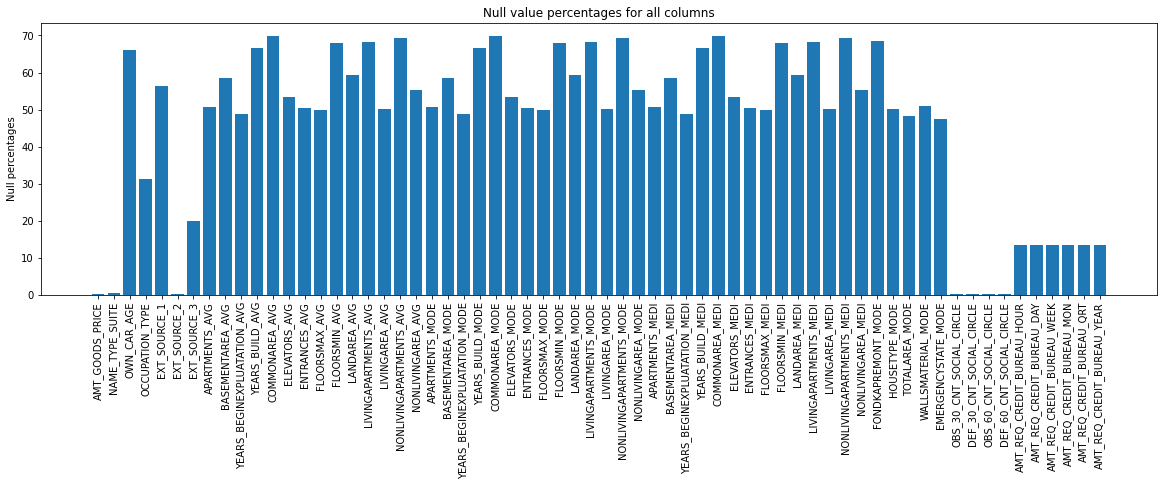

In [141]:
#lets plot all the null values in a bargraph to see how are they distributed
plt.figure(figsize=(20,5))
plt.bar(app_null.keys(), app_null.values)
plt.title ('Null value percentages for all columns')
plt.ylabel('Null percentages')
plt.xticks(rotation=90)
plt.show()

### 2.b Now we need to drop the columns with null percentage greater than 50%
listing all the column names

In [142]:
column_null_50List = app_data.columns[app_data.isnull().mean()*100>50]
column_null_50List

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')

In [143]:
len(column_null_50List)

41

In [144]:
#dropping these columns and getting new data frame instaed of altering orginal data frame
app_df2 = app_data.drop(column_null_50List,axis=1)

In [145]:
app_df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
#finding shape of new dataframe
app_df2.shape

(307511, 81)

In [147]:
#checking null percentages for the new dataframe
np.round((app_df2.isnull().mean()*100),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL  

### If we observe there are null values around 13% and some above first lets handle columns qwith null values with around 13%
### 2. c Finding columns with null Percenatge around 13

In [148]:
#for that filter with below 13%
app_Null_13list = app_null[app_null<13]

In [149]:
app_Null_13list

AMT_GOODS_PRICE             0.09
NAME_TYPE_SUITE             0.42
EXT_SOURCE_2                0.21
OBS_30_CNT_SOCIAL_CIRCLE    0.33
DEF_30_CNT_SOCIAL_CIRCLE    0.33
OBS_60_CNT_SOCIAL_CIRCLE    0.33
DEF_60_CNT_SOCIAL_CIRCLE    0.33
dtype: float64

In [150]:
len(app_Null_13list) , app_Null_13list

(7,
 AMT_GOODS_PRICE             0.09
 NAME_TYPE_SUITE             0.42
 EXT_SOURCE_2                0.21
 OBS_30_CNT_SOCIAL_CIRCLE    0.33
 DEF_30_CNT_SOCIAL_CIRCLE    0.33
 OBS_60_CNT_SOCIAL_CIRCLE    0.33
 DEF_60_CNT_SOCIAL_CIRCLE    0.33
 dtype: float64)

## 2.d understanding the dtypes of variables for the above list

In [151]:
app_df2[app_Null_13list.index].dtypes

AMT_GOODS_PRICE             float64
NAME_TYPE_SUITE              object
EXT_SOURCE_2                float64
OBS_30_CNT_SOCIAL_CIRCLE    float64
DEF_30_CNT_SOCIAL_CIRCLE    float64
OBS_60_CNT_SOCIAL_CIRCLE    float64
DEF_60_CNT_SOCIAL_CIRCLE    float64
dtype: object

###  Here first we have one categorical column 'NAME_TYPE_SUITE'

In [152]:
#lets observe this column values
app_df2.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [153]:
# here if we see the most frequent value is 'Unaccompanied' , 
# since it is the mode or highly frequent value we can impute it.

In [154]:
app_df2['NAME_TYPE_SUITE'].fillna(value= app_df2.NAME_TYPE_SUITE.mode()[0],inplace=True)

In [155]:
app_df2.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [156]:
#Next if we observe  AMT_GOODS_PRICE it is a continous variable


In [157]:
app_df2.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [158]:
#From the above we cannot figure out much difference in the values.
#Lets observe the values spread through a box plot

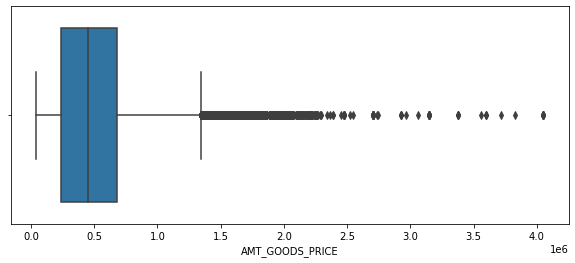

In [159]:
plt.figure(figsize=(10,4))
sns.boxplot(data = app_df2,x=app_df2['AMT_GOODS_PRICE'])
plt.show()

In [160]:
## here if we see there are few values to the right, 
## so we can say the data is skewed so it is better to  impute the missing values with median
app_df2.AMT_GOODS_PRICE.median()

450000.0

In [161]:
app_df2['AMT_GOODS_PRICE'].fillna(value= app_df2.AMT_GOODS_PRICE.median(),inplace=True)

### EXT_SOURCE_2

In [162]:
app_df2.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

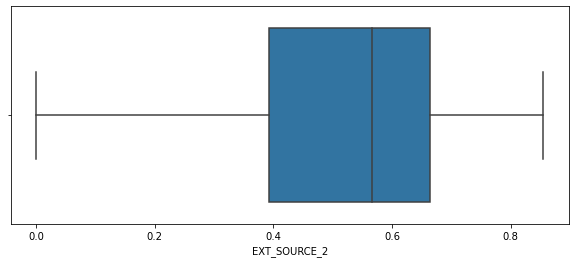

In [163]:
plt.figure(figsize=(10,4))
sns.boxplot(data = app_df2,x=app_df2['EXT_SOURCE_2'])
plt.show()

In [164]:
## here there are no outliers but most of the values are towards the left before the median , 
## so it is better to replace with mdeian again

In [165]:
app_df2.EXT_SOURCE_2.median()

0.5659614260608526

In [166]:
app_df2['EXT_SOURCE_2'].fillna(value= app_df2.EXT_SOURCE_2.median(),inplace=True)

In [167]:
app_df2.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
24.0         11
25.0         11
27.0          5
26.0          3
30.0          2
348.0         1
28.0          1
47.0          1
29.0          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [168]:
app_df2.OBS_30_CNT_SOCIAL_CIRCLE.mode()

0    0.0
dtype: float64

In [169]:
#If we see here maximum values are Zero the other values 
# DEF_30_CNT_SOCIAL_CIRCLE
# OBS_60_CNT_SOCIAL_CIRCLE   
# DEF_60_CNT_SOCIAL_CIRCLE 
# are also in same format.So we can replace all of tem with mode = 0

In [170]:
app_df2['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(value= app_df2.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace=True)

In [171]:
app_df2['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(value= app_df2.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace=True)

In [172]:
app_df2['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(value= app_df2.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace=True)

In [173]:
app_df2['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(value= app_df2.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace=True)

### Dropping unwanted columns

In [174]:
# there are still many columns , so we can go head and remove some columns which are of not that use and wont impact analysis
#this way analysis would be easier

In [175]:
#listing columns which are of less use for analysis
app_df2.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [176]:
### 1 if we look at the column list all the FLAG_DOCUMENTS , are of not much of use for our analysis
### 2.the column of types flag_mobile and other details also can excluded
### 3. client region ratings
### 4.CNT_FAM_MEMBERS can also be removed
### 5.columns like FLOORSMAX_AVG , FLOORSMAX_MODE also can be considered to remove


In [177]:
app_columns_drop = ['FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21','FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'EMERGENCYSTATE_MODE','YEARS_BEGINEXPLUATATION_AVG',]

In [178]:
len(app_columns_drop)

37

In [179]:
app_df2.drop(labels=app_columns_drop,axis=1,inplace=True)

In [180]:
app_df2.shape

(307511, 44)

## Data dtypes correction

In [181]:
app_df2.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [182]:
# Here some of the columns are in negative values which shouldnt be .
# these needs to corrected using abs()

In [183]:
app_df2['DAYS_EMPLOYED'] = app_df2['DAYS_EMPLOYED'].abs()
app_df2['DAYS_REGISTRATION'] = app_df2['DAYS_REGISTRATION'].abs()
app_df2['DAYS_ID_PUBLISH'] = app_df2['DAYS_ID_PUBLISH'].abs()
app_df2['DAYS_BIRTH'] = app_df2['DAYS_BIRTH'].abs()
app_df2['DAYS_LAST_PHONE_CHANGE'] = app_df2['DAYS_LAST_PHONE_CHANGE'].abs()

In [184]:
app_df2.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [185]:
app_df2.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)

In [186]:
app_df2.CODE_GENDER.value_counts(normalize = True)

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

In [187]:
#female percentage is more so replace XNA with F
app_df2.CODE_GENDER.replace(to_replace='XNA',value='F',inplace=True)#

In [188]:
app_df2.CODE_GENDER.value_counts(normalize = True)

F    0.658357
M    0.341643
Name: CODE_GENDER, dtype: float64

In [189]:
app_df2.OCCUPATION_TYPE.unique() #No XNA values

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [190]:
app_df2.ORGANIZATION_TYPE.unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [191]:
app_df2.ORGANIZATION_TYPE.value_counts(normalize=True)*100

Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant                 0

In [192]:
# this is about 18% of values so imputation with particular  is not possible , 
# so we can replace them with NaN values so that they can be calculated

In [193]:
# replace XNA with NaN
app_df2.ORGANIZATION_TYPE.replace(to_replace='XNA',value=np.nan,inplace=True)

## Analysing numerical variables for outliers

In [194]:
app_df2.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0


In [195]:
# lets analyse each of them using boxplot or subplots 
# CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

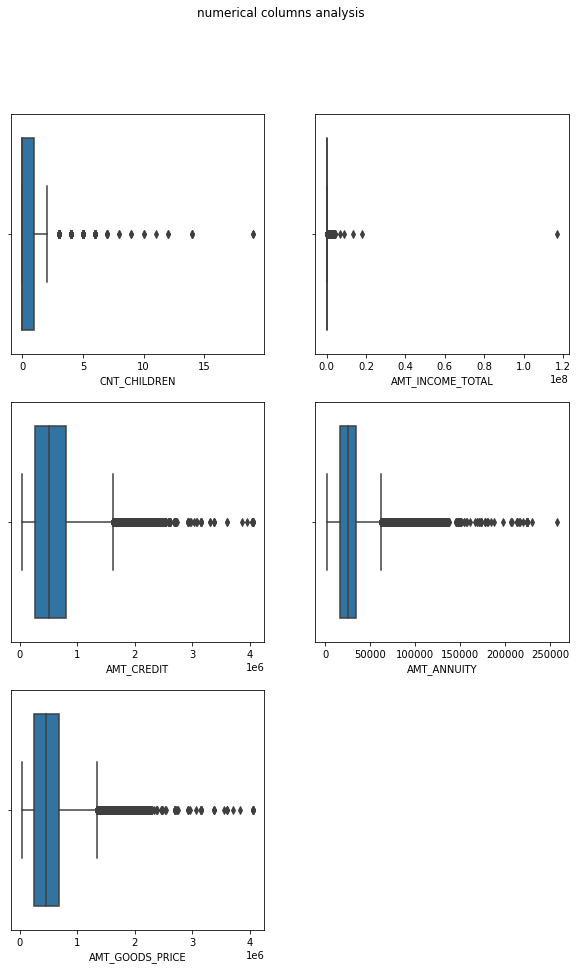

In [196]:
plt.figure(figsize=(10,15))
plt.suptitle("numerical columns analysis")

plt.subplot(3,2,1)
sns.boxplot(data=app_df2,x='CNT_CHILDREN')

plt.subplot(3,2,2)
sns.boxplot(data =app_df2,x='AMT_INCOME_TOTAL')

plt.subplot(3,2,3)
sns.boxplot(data=app_df2,x='AMT_CREDIT')

plt.subplot(3,2,4)
sns.boxplot(data =app_df2,x='AMT_ANNUITY')

plt.subplot(3,2,5)
sns.boxplot(data=app_df2,x='AMT_GOODS_PRICE')

plt.show()

In [197]:
# here for most the values there are outliers we need to treat them by capping them

## AMT_CREDIT

In [198]:
# here if we see there are few outliers at the extreme

app_df2.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [199]:
# finding the quartiles and IQR for AMT_CREDIT

q1 = app_df2.AMT_CREDIT.quantile(0.25)
q3 = app_df2.AMT_CREDIT.quantile(0.75)

iqr = q3-q1

upper_whisker = q3 + 1.5*iqr
lower_whisker = q3-1.5*iqr

In [200]:
upper_whisker

1616625.0

In [201]:
app_df2 = app_df2[app_df2['AMT_CREDIT'] < upper_whisker]

### AMT_ANNUITY

In [202]:
# finding the quartiles and IQR for AMT_ANNUITY

q1 = app_df2.AMT_ANNUITY.quantile(0.25)
q3 = app_df2.AMT_ANNUITY.quantile(0.75)

iqr = q3-q1

upper_whisker = q3 + 1.5*iqr
lower_whisker = q3-1.5*iqr

In [203]:
upper_whisker

59469.75

In [204]:
app_df2 = app_df2[app_df2['AMT_ANNUITY'] < upper_whisker]

### AMT_GOODS_PRICE

In [205]:
#AMT_GOODS_PRICE


q1 = app_df2.AMT_GOODS_PRICE.quantile(0.25)
q3 = app_df2.AMT_GOODS_PRICE.quantile(0.75)

iqr = q3-q1

upper_whisker = q3 + 1.5*iqr
lower_whisker = q3-1.5*iqr

In [206]:
upper_whisker

1343250.0

In [207]:
app_df2 = app_df2[app_df2['AMT_GOODS_PRICE'] < upper_whisker]

### AMT_INCOME_TOTAL

In [208]:
app_df2.AMT_INCOME_TOTAL.describe()

count    2.884940e+05
mean     1.616040e+05
std      2.351131e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.350000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [209]:
q1 = app_df2.AMT_INCOME_TOTAL.quantile(0.25)
q3 = app_df2.AMT_INCOME_TOTAL.quantile(0.75)

iqr = q3-q1

upper_whisker = q3 + 1.5*iqr
lower_whisker = q3-1.5*iqr

In [210]:
app_df2 = app_df2[app_df2['AMT_INCOME_TOTAL'] < upper_whisker]

In [211]:
#Now lets see all the plots again

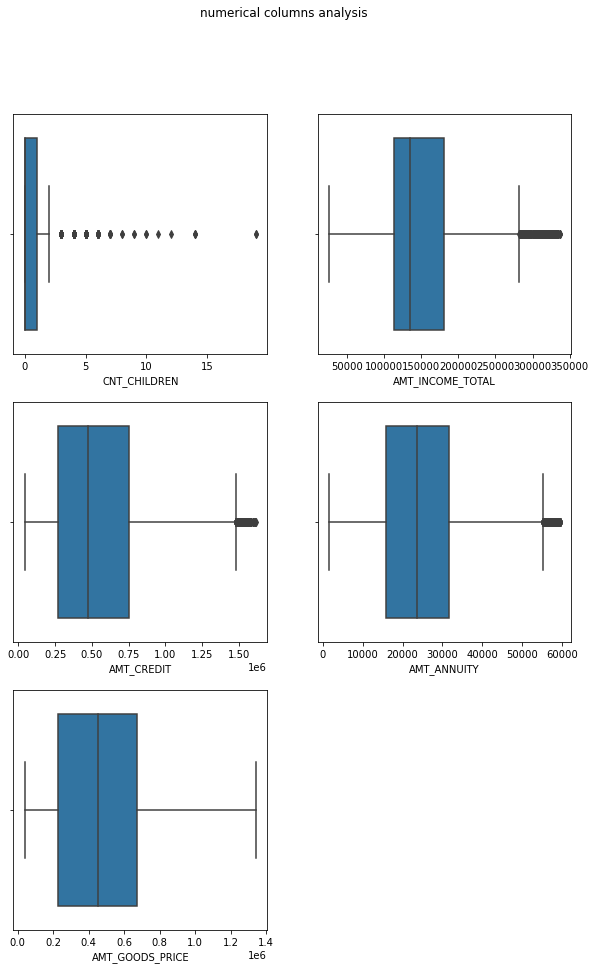

In [212]:
plt.figure(figsize=(10,15))
plt.suptitle("numerical columns analysis")

plt.subplot(3,2,1)
sns.boxplot(data=app_df2,x='CNT_CHILDREN')

plt.subplot(3,2,2)
sns.boxplot(data =app_df2,x='AMT_INCOME_TOTAL')

plt.subplot(3,2,3)
sns.boxplot(data=app_df2,x='AMT_CREDIT')

plt.subplot(3,2,4)
sns.boxplot(data =app_df2,x='AMT_ANNUITY')

plt.subplot(3,2,5)
sns.boxplot(data=app_df2,x='AMT_GOODS_PRICE')

plt.show()

In [213]:
# it seems the ouliers are handled

In [214]:
app_df2.shape

(277143, 44)

## Binning

In [215]:
# converting numerical into categorical

In [216]:
#we can take two of the numerical varibale which can be binned AMT_CREDIT,AMT_INCOME_TOTAL

In [217]:
app_df2['AMT_INCOME_TOTAL_Bucket'] = pd.qcut(app_df2.AMT_INCOME_TOTAL, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL","L","M","H","VH"])

In [218]:
app_df2['AMT_INCOME_TOTAL'].value_counts()

135000.0    34787
112500.0    30634
157500.0    25476
180000.0    23135
90000.0     22333
            ...  
234054.0        1
123219.0        1
256950.0        1
80302.5         1
131125.5        1
Name: AMT_INCOME_TOTAL, Length: 2015, dtype: int64

In [219]:
app_df2['AMT_CREDIT_Bucket'] = pd.qcut(app_df2.AMT_CREDIT, [0, 0.2, 0.4, 0.6, 0.8, 1], ["Very_Low_credit","Low_credit","Mid_Credit","High_credit","V.High_Credit"])

In [220]:
app_df2['AMT_CREDIT'].value_counts()

450000.0     9249
675000.0     8186
225000.0     8026
180000.0     7246
270000.0     7053
             ... 
1149565.5       1
411417.0        1
1355328.0       1
1054755.0       1
848308.5        1
Name: AMT_CREDIT, Length: 4256, dtype: int64

## Dividing the Dataframe into different sets based on Target value 0,1

In [221]:
app_Target0 = app_df2.loc[app_df2['TARGET']==0]

In [222]:
app_Target0.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_Bucket,AMT_CREDIT_Bucket
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,VH,V.High_Credit
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,VL,Very_Low_credit
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,NaN,NaN,NaN,NaN,NaN,NaN,M,Low_credit
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,L,Mid_Credit
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,Laborers,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,2536.0,0.0,0.0,0.0,0.0,1.0,1.0,L,Mid_Credit


In [223]:
app_Target0.shape

(253892, 46)

In [224]:
app_Target1 = app_df2.loc[app_df2['TARGET']==1]

In [225]:
app_Target1.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_Bucket,AMT_CREDIT_Bucket
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,H,Mid_Credit
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628,6573.0,1827,Cooking staff,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,161.0,0.0,0.0,0.0,0.0,2.0,2.0,L,V.High_Credit
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,Laborers,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,1075.0,0.0,0.0,0.0,2.0,0.0,4.0,H,V.High_Credit
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,3597,45.0,4409,Sales staff,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,1480.0,0.0,0.0,0.0,0.0,0.0,2.0,M,Low_credit
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,24794,365243,5391.0,4199,NaN,THURSDAY,10,0,0,0,0,0,0,NaN,0.023952,0.720944,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,VL,Low_credit


In [226]:
app_Target1.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_Bucket,AMT_CREDIT_Bucket
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,H,Mid_Credit
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628,6573.0,1827,Cooking staff,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,161.0,0.0,0.0,0.0,0.0,2.0,2.0,L,V.High_Credit
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,Laborers,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,1075.0,0.0,0.0,0.0,2.0,0.0,4.0,H,V.High_Credit
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,3597,45.0,4409,Sales staff,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,1480.0,0.0,0.0,0.0,0.0,0.0,2.0,M,Low_credit
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,24794,365243,5391.0,4199,NaN,THURSDAY,10,0,0,0,0,0,0,NaN,0.023952,0.720944,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,VL,Low_credit


## Univariate analysis for categorical

### univariate - Target0 set

### CODE_GENDER

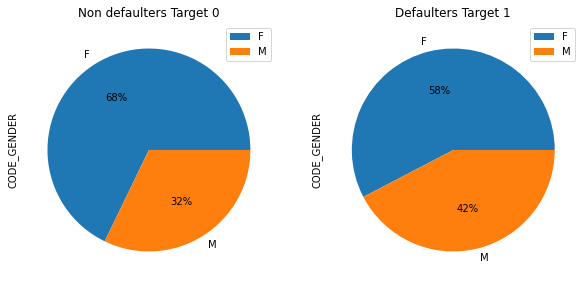

In [227]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Non defaulters Target 0")
app_Target0.CODE_GENDER.value_counts(normalize=True).plot.pie(autopct = "%1.0f%%")
plt.legend()

plt.subplot(1,2,2)
plt.title("Defaulters Target 1")
app_Target1.CODE_GENDER.value_counts(normalize=True).plot.pie(autopct = "%1.0f%%")
plt.legend()

plt.show()

this shows that in both the cases , For defualters and Non defaulters,
Female percenatage is more

### NAME_CONTRACT_TYPE

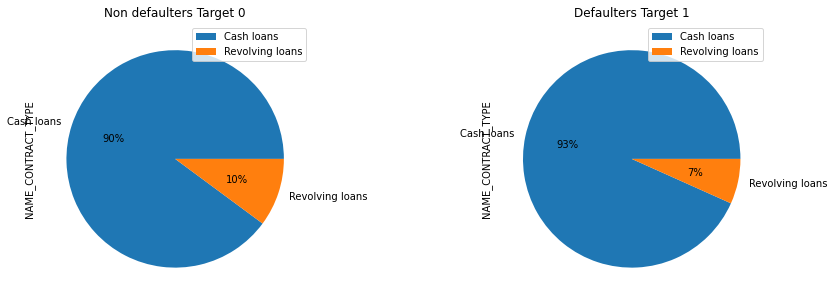

In [228]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title("Non defaulters Target 0")
app_Target0.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.pie(autopct = "%1.0f%%")
plt.legend()

plt.subplot(1,2,2)
plt.title("Defaulters Target 1")
app_Target1.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.pie(autopct = "%1.0f%%")
plt.legend()

plt.show()

For the CONTRACT_TYPE , The Cash loans perceantage increases or is more in defaulters categeory and revolving loans is less
So it can be concluded that in case of dafulters most of them are in contract type - 'Cash loans'

### NAME_TYPE_SUITE

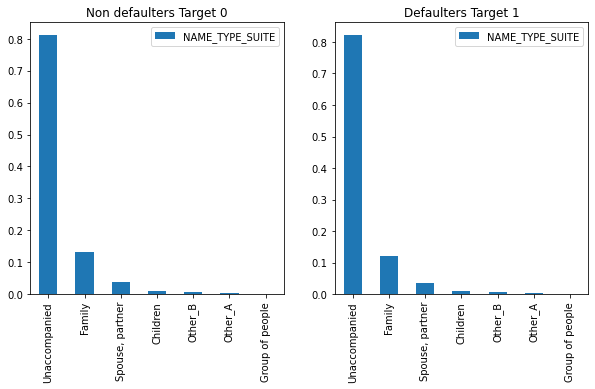

In [229]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Non defaulters Target 0")
app_Target0.NAME_TYPE_SUITE.value_counts(normalize=True).plot.bar()
plt.legend()

plt.subplot(1,2,2)
plt.title("Defaulters Target 1")
app_Target1.NAME_TYPE_SUITE.value_counts(normalize=True).plot.bar()

plt.legend()
plt.show()

### NAME_INCOME_TYPE

In [230]:
app_Target0.NAME_INCOME_TYPE.value_counts(normalize=True)

Working                 0.519721
Commercial associate    0.217270
Pensioner               0.193366
State servant           0.069522
Student                 0.000063
Unemployed              0.000039
Businessman             0.000012
Maternity leave         0.000008
Name: NAME_INCOME_TYPE, dtype: float64

In [231]:
app_Target1.NAME_INCOME_TYPE.value_counts(normalize=True)

Working                 0.622683
Commercial associate    0.205626
Pensioner               0.121844
State servant           0.049460
Unemployed              0.000344
Maternity leave         0.000043
Name: NAME_INCOME_TYPE, dtype: float64

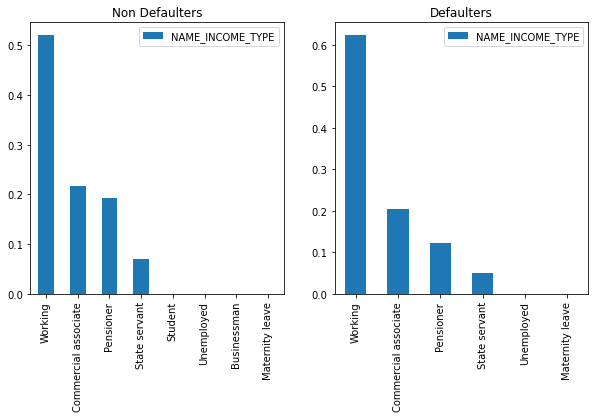

In [232]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

app_Target0.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.title("Non Defaulters")
plt.legend()

plt.subplot(1,2,2)
plt.title("Defaulters")
app_Target1.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()

plt.legend()
plt.show()

In [233]:
# From the above observation , there is an increase in working categoery and decraese in others in Defaulters case.
# so we can here deduct there is a possibility that people who are working income type can be defaulters.

### NAME_EDUCATION_TYPE

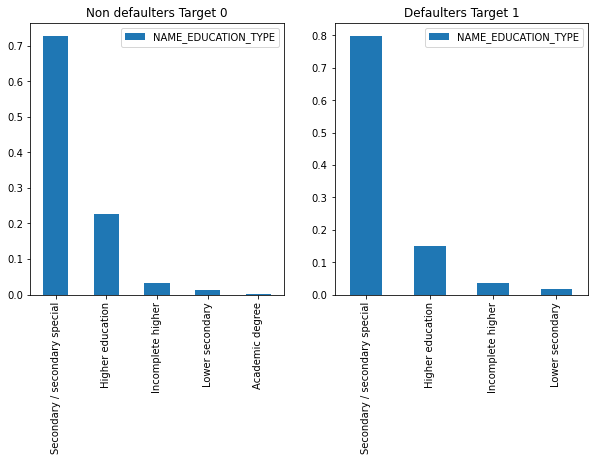

In [234]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Non defaulters Target 0")
app_Target0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
plt.legend()

plt.subplot(1,2,2)
plt.title("Defaulters Target 1")
app_Target1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()

plt.legend()
plt.show()

In [235]:
# similary there is also increase in secondary/secondary special Educational type,the others tends to be less.

### NAME_FAMILY_STATUS

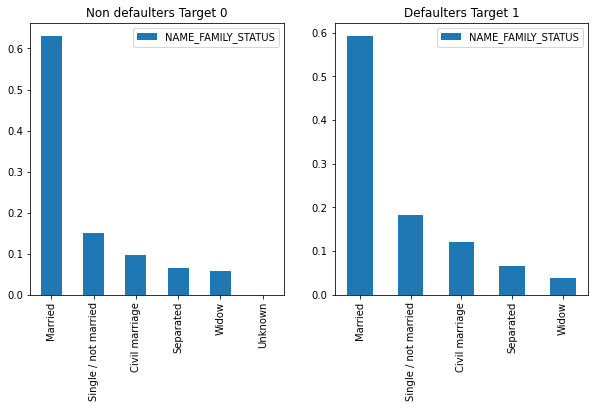

In [236]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Non defaulters Target 0")
app_Target0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.legend()

plt.subplot(1,2,2)
plt.title("Defaulters Target 1")
app_Target1.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()

plt.legend()
plt.show()

In [237]:
# there is no much difference being displayed here

In [238]:
app_Target0.NAME_HOUSING_TYPE.value_counts(normalize=True)

House / apartment      0.887913
With parents           0.048272
Municipal apartment    0.036299
Rented apartment       0.015495
Office apartment       0.008334
Co-op apartment        0.003687
Name: NAME_HOUSING_TYPE, dtype: float64

In [239]:
app_Target1.NAME_HOUSING_TYPE.value_counts(normalize=True)

House / apartment      0.854845
With parents           0.071137
Municipal apartment    0.038880
Rented apartment       0.024601
Office apartment       0.006967
Co-op apartment        0.003570
Name: NAME_HOUSING_TYPE, dtype: float64

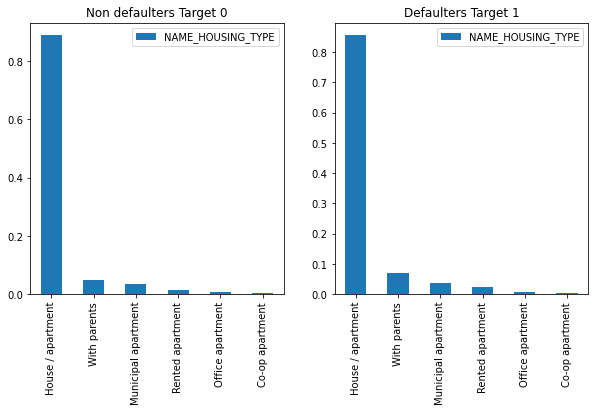

In [240]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Non defaulters Target 0")
app_Target0.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar()
plt.legend()

plt.subplot(1,2,2)
plt.title("Defaulters Target 1")
app_Target1.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar()

plt.legend()
plt.show()

In [241]:
# Except for house/apartment and with parents everything seems to increase in defaulters set

## Univariate Numerical columns

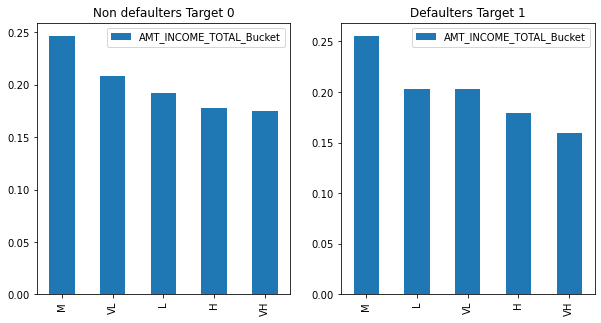

In [242]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Non defaulters Target 0")
app_Target0.AMT_INCOME_TOTAL_Bucket.value_counts(normalize=True).plot.bar()
plt.legend()

plt.subplot(1,2,2)
plt.title("Defaulters Target 1")
app_Target1.AMT_INCOME_TOTAL_Bucket.value_counts(normalize=True).plot.bar()

plt.legend()
plt.show()

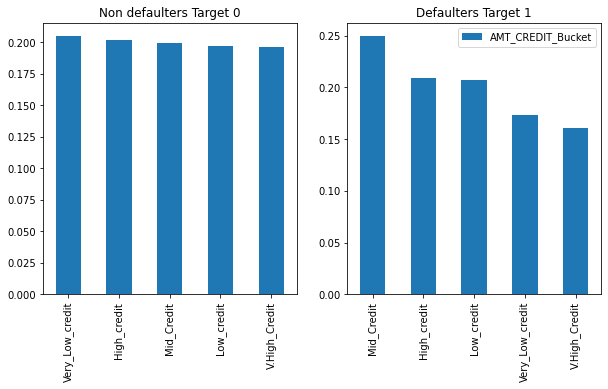

In [243]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Non defaulters Target 0")
app_Target0.AMT_CREDIT_Bucket.value_counts(normalize=True).plot.bar()
#plt.legend()

plt.subplot(1,2,2)
plt.title("Defaulters Target 1")
app_Target1.AMT_CREDIT_Bucket.value_counts(normalize=True).plot.bar()

plt.legend()
plt.show()

In [244]:
# from the above observations we can see that there is high credit value for mid_credit in defaulters set, also
# And the other ranges seems to be decreased.

### AMT_ANNUITY

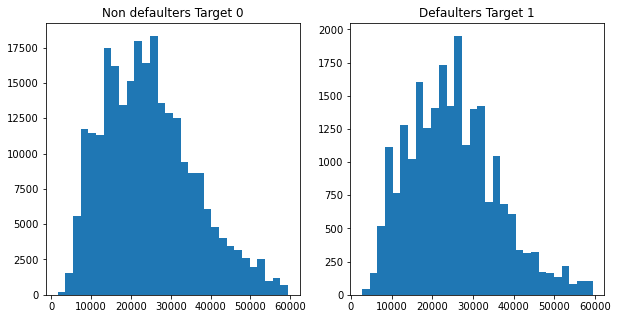

In [245]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Non defaulters Target 0")
plt.hist(app_Target0.AMT_ANNUITY,bins=30)


plt.subplot(1,2,2)
plt.title("Defaulters Target 1")
plt.hist(app_Target1.AMT_ANNUITY,bins=30)


plt.show()

### AMT_GOODS_PRICE

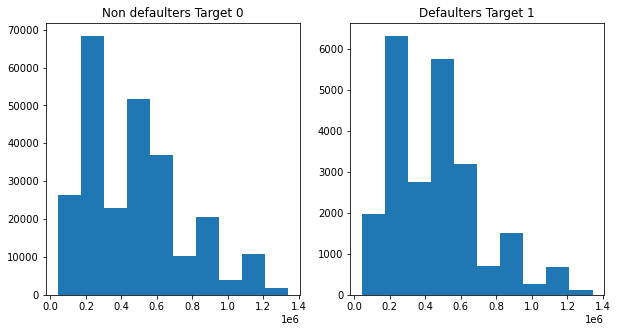

In [246]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Non defaulters Target 0")
plt.hist(app_Target0.AMT_GOODS_PRICE)


plt.subplot(1,2,2)
plt.title("Defaulters Target 1")
plt.hist(app_Target1.AMT_GOODS_PRICE)


plt.show()

## correlation for numerical columns

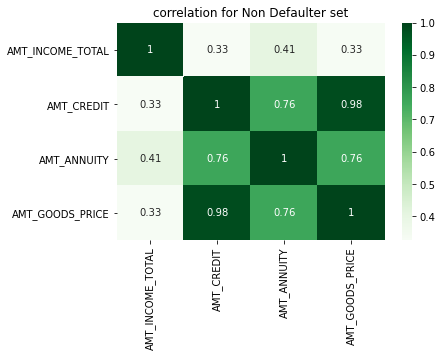

In [247]:
sns.heatmap(app_Target0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].corr(),annot = True,cmap="Greens")
plt.title("correlation for Non Defaulter set")
plt.show()

#### correlation for Target0 set
    - first the highest correlation is between themselves but apart from that
    - we can see there is high correlation between  AMT_CREDIT and AMT_INCOME_TOTAL - 0.98
    - Next comes AMT_ANNUITY vs AMT_GOODS_PRICE , AMT_ANNUITY vs AMY_CREDIT -0.76
    - and the least seems to be between AMT_INCOME_TOTAL vs AMT_INCOME_TOTAL and AMT_INCOME_TOTAL vs AMY_CREDIT - 0.33

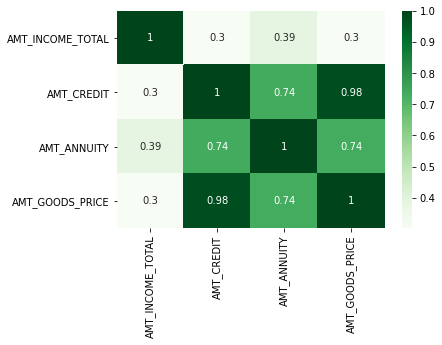

In [248]:
sns.heatmap(app_Target1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].corr(),annot = True,cmap="Greens")
plt.show()

#### correlation for Target1 set - correlation follows same trend but slightest difference in values
    - first the highest correlation is between themselves but aprt from that
    - we can see there is high correlation between  AMT_CREDIT and AMT_INCOME_TOTAL - 0.98
    - Next comes AMT_ANNUITY vs AMT_GOODS_PRICE , AMT_ANNUITY vs AMY_CREDIT -0.74
    - and the least seems to be between AMT_INCOME_TOTAL vs AMT_INCOME_TOTAL and AMT_INCOME_TOTAL vs AMY_CREDIT - 0.3

## Bivariate Analysis

## Numerical and Categorical

In [249]:
app_Target0.groupby('CODE_GENDER')[['AMT_INCOME_TOTAL','AMT_CREDIT']].aggregate(['mean','median'])

AMT_INCOME_TOTAL               AMT_CREDIT          
                        mean    median           mean    median
CODE_GENDER                                                    
F              141540.393952  135000.0  530230.183841  473760.0
M              168164.146749  157500.0  532752.658002  472500.0

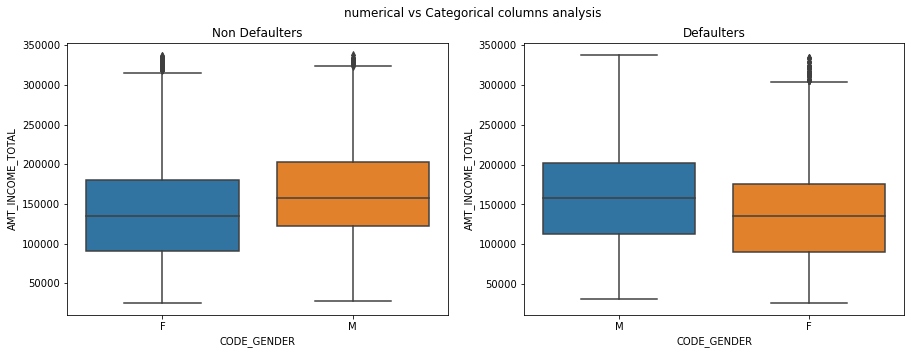

In [250]:
plt.figure(figsize=(15,5))
plt.suptitle("numerical vs Categorical columns analysis")

plt.subplot(1,2,1)
plt.title('Non Defaulters')
sns.boxplot(data=app_Target0,x='CODE_GENDER',y='AMT_INCOME_TOTAL')

plt.subplot(1,2,2)
plt.title('Defaulters')
sns.boxplot(data=app_Target1,x='CODE_GENDER',y='AMT_INCOME_TOTAL')

plt.show()




In [251]:
#female lower income are most part of defaulter

In [252]:
app_Target0.groupby('NAME_CONTRACT_TYPE')['AMT_INCOME_TOTAL'].aggregate(['mean','median'])

,mean,median
NAME_CONTRACT_TYPE,,
Cash loans,150822.360125,135000.0
Revolving loans,143779.773789,135000.0


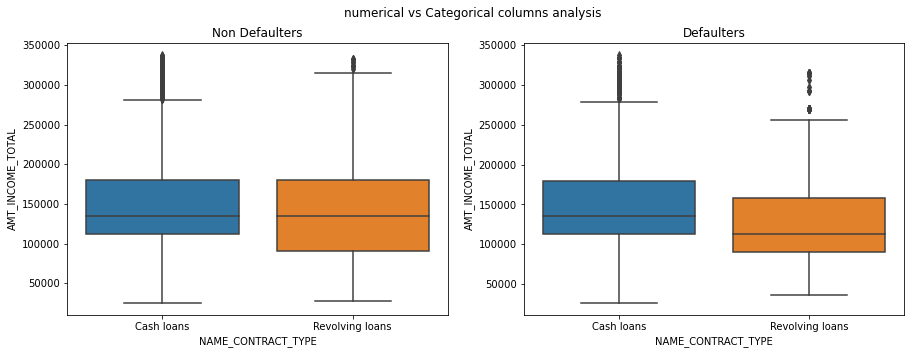

In [253]:
plt.figure(figsize=(15,5))
plt.suptitle("numerical vs Categorical columns analysis")

plt.subplot(1,2,1)
plt.title('Non Defaulters')
sns.boxplot(data=app_Target0,x='NAME_CONTRACT_TYPE',y='AMT_INCOME_TOTAL')

plt.subplot(1,2,2)
plt.title('Defaulters')
sns.boxplot(data=app_Target1,x='NAME_CONTRACT_TYPE',y='AMT_INCOME_TOTAL')

plt.show()




In [254]:
# for defaulters are mostly on lower income range - revolving loans

In [255]:
app_Target0.groupby('NAME_EDUCATION_TYPE')['AMT_CREDIT'].aggregate(['mean','median'])

,mean,median
NAME_EDUCATION_TYPE,,
Academic degree,580705.903361,481500.0
Higher education,562232.055159,500211.0
Incomplete higher,498744.599892,450000.0
Lower secondary,468030.625190,407520.0
Secondary / secondary special,523922.705044,463284.0


In [256]:
app_Target1.groupby('NAME_EDUCATION_TYPE')['AMT_CREDIT'].aggregate(['mean','median'])

,mean,median
NAME_EDUCATION_TYPE,,
Higher education,562829.349942,521280.0
Incomplete higher,490977.145161,450000.0
Lower secondary,474039.330073,448056.0
Secondary / secondary special,514752.165223,458725.5


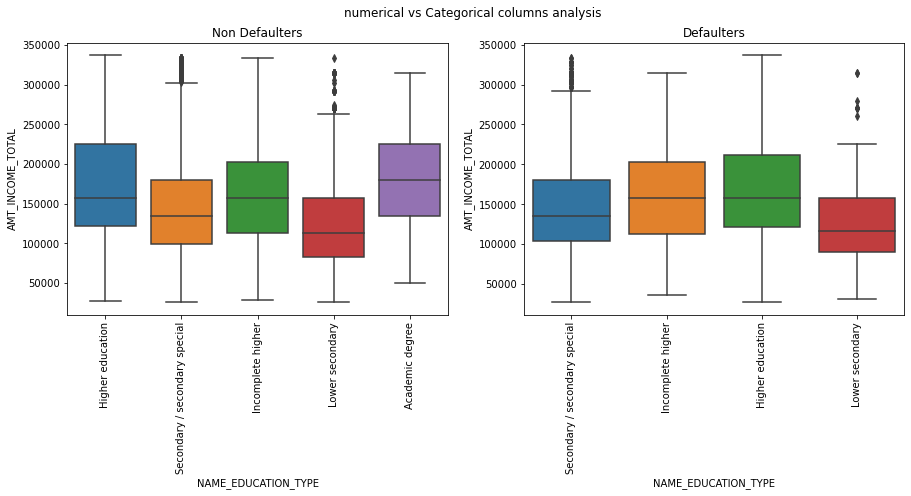

In [257]:
plt.figure(figsize=(15,5))
plt.suptitle("numerical vs Categorical columns analysis")

plt.subplot(1,2,1)
plt.title('Non Defaulters')
sns.boxplot(data=app_Target0,x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Defaulters')
sns.boxplot(data=app_Target1,x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL')
plt.xticks(rotation=90)

plt.show()




In [258]:
app_Target1.groupby('NAME_HOUSING_TYPE')['AMT_INCOME_TOTAL'].aggregate(['mean','median'])

,mean,median
NAME_HOUSING_TYPE,,
Co-op apartment,159789.795181,153000.0
House / apartment,148906.860586,135000.0
Municipal apartment,148776.969027,135000.0
Office apartment,151965.361111,135000.0
Rented apartment,148926.768357,135000.0
With parents,141388.277811,135000.0


In [259]:
app_Target0.groupby('NAME_HOUSING_TYPE')['AMT_INCOME_TOTAL'].aggregate(['mean','median'])

,mean,median
NAME_HOUSING_TYPE,,
Co-op apartment,153049.658654,135000.0
House / apartment,150068.985199,135000.0
Municipal apartment,151320.132812,135000.0
Office apartment,161241.169423,157500.0
Rented apartment,152524.891967,135000.0
With parents,147008.444246,135000.0


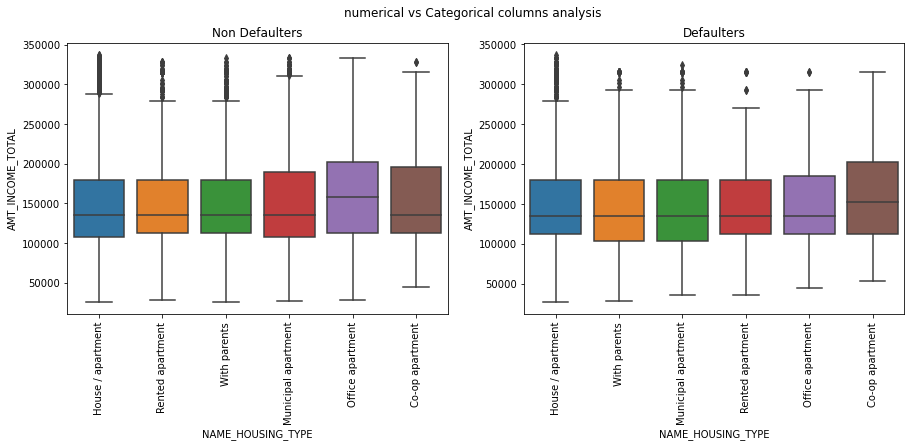

In [260]:
plt.figure(figsize=(15,5))
plt.suptitle("numerical vs Categorical columns analysis")

plt.subplot(1,2,1)
plt.title('Non Defaulters')
sns.boxplot(data=app_Target0,x='NAME_HOUSING_TYPE',y='AMT_INCOME_TOTAL')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Defaulters')
sns.boxplot(data=app_Target1,x='NAME_HOUSING_TYPE',y='AMT_INCOME_TOTAL')
plt.xticks(rotation=90)

plt.show()




In [ ]:
## people who live in co -aprtment tends to increase with higher quartile range in income for defaulters

In [ ]:
### pairplot for all numerical columns:

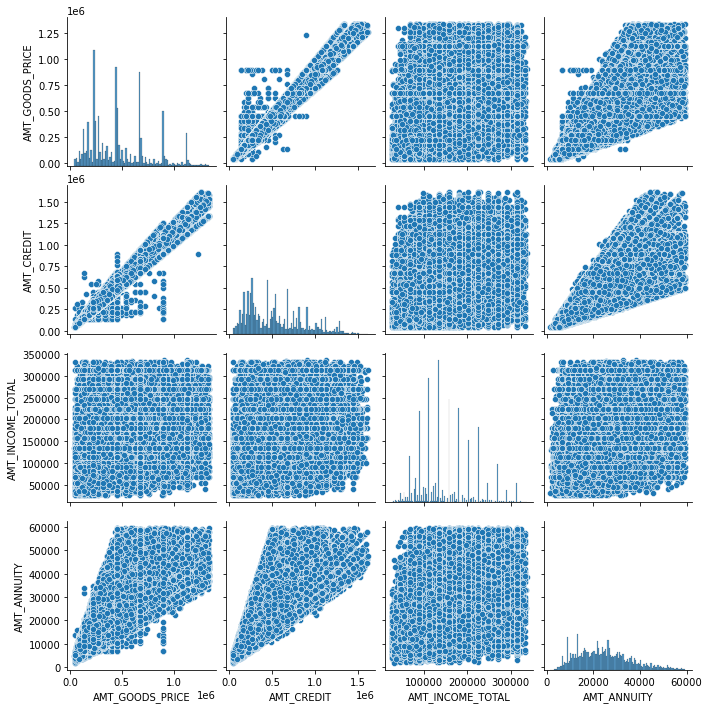

In [261]:
sns.pairplot(data=app_Target0,vars={'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'})
plt.show()

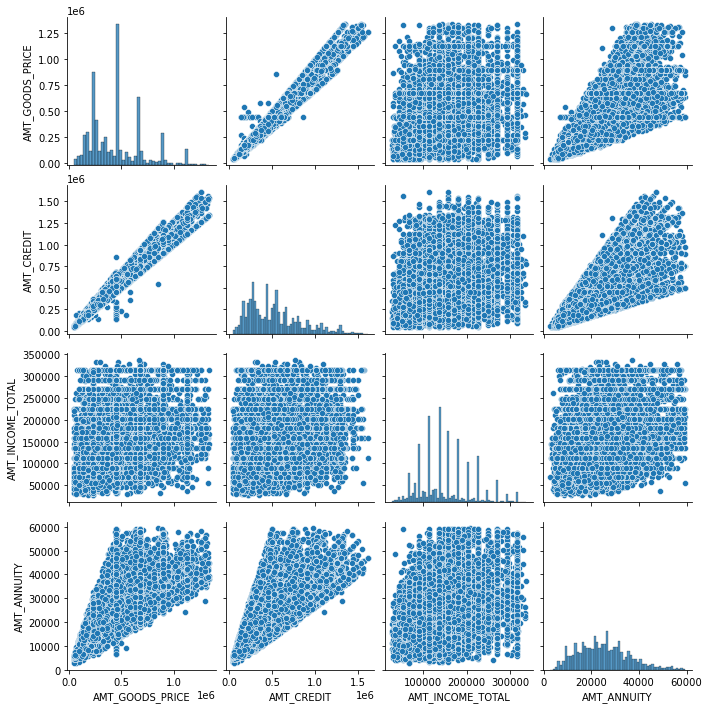

In [262]:
sns.pairplot(data=app_Target1,vars={'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'})
plt.show()

In [ ]:
# Not much detailed information can be derived from these pair plots as there is big clusted of data togeether and 
# also seems to be same in distibution between Defulters set and Non defauletrs set
# Except there is  litle decrease in AMT_INCOME_TOTAL ,increase in GOODS_Price

## loading previous application

In [263]:
prev_app = pd.read_csv('previous_application.csv')

In [264]:
prev_app.shape

(1670214, 37)

In [265]:
prev_app.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
prev_app.dtypes

In [266]:
#Null values
prev_app.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [267]:
#removing values baove 50 and loading new data set
prev_column_null_50List = prev_app.columns[prev_app.isnull().mean()*100>50]
prev_column_null_50List 

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED'],
      dtype='object')

In [268]:
len(prev_column_null_50List)

4

In [269]:
prev_appdf2 = prev_app.drop(prev_column_null_50List,axis=1)

In [ ]:
#merging two dataframes

In [270]:
df_combined = pd.merge(left=app_df2,right=prev_appdf2,how='inner',on='SK_ID_CURR')

In [271]:
df_combined.shape

(1279393, 78)

In [272]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1279393 entries, 0 to 1279392
Data columns (total 78 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1279393 non-null  int64   
 1   TARGET                        1279393 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1279393 non-null  object  
 3   CODE_GENDER                   1279393 non-null  object  
 4   FLAG_OWN_CAR                  1279393 non-null  object  
 5   FLAG_OWN_REALTY               1279393 non-null  object  
 6   CNT_CHILDREN                  1279393 non-null  int64   
 7   AMT_INCOME_TOTAL              1279393 non-null  float64 
 8   AMT_CREDIT_x                  1279393 non-null  float64 
 9   AMT_ANNUITY_x                 1279393 non-null  float64 
 10  AMT_GOODS_PRICE_x             1279393 non-null  float64 
 11  NAME_TYPE_SUITE_x             1279393 non-null  object  
 12  NAME_INCOME_TY

In [273]:
df_combined.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_Bucket,AMT_CREDIT_Bucket,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,H,Mid_Credit,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,VH,V.High_Credit,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,VH,V.High_Credit,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,VH,V.High_Credit,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,VL,Very_Low_credi

In [274]:
#checking the column names
df_combined.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_x',
       'HOUR_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY',

In [275]:
# lets remove some unwanted columns

combined_col_removal = ['REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [276]:
df_combined.drop(combined_col_removal,axis=1,inplace=True)

In [277]:
df_combined.shape

(1279393, 71)

In [ ]:
df_combined.groupby('NAME_CONTRACT_STATUS')['TARGET'].count() #Gives list

In [ ]:
sns.countplot(data = df_combined, x= 'NAME_CONTRACT_STATUS',hue = 'TARGET') 
plt.show()

In [280]:
df_combined.NAME_CASH_LOAN_PURPOSE.replace('XNA',np.nan,inplace=True)

In [282]:
df_combined.NAME_CASH_LOAN_PURPOSE.replace('XAP',np.nan,inplace=True)

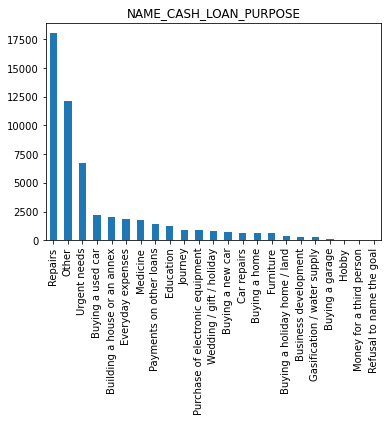

In [320]:
df_combined.NAME_CASH_LOAN_PURPOSE.value_counts().plot.bar()
plt.title("NAME_CASH_LOAN_PURPOSE")
plt.show()

In [296]:
df_combined.NAME_PAYMENT_TYPE.value_counts(normalize=True)

Cash through the bank                        0.622907
XNA                                          0.371328
Non-cash from your account                   0.005120
Cashless from the account of the employer    0.000644
Name: NAME_PAYMENT_TYPE, dtype: float64

In [303]:
df_combined.NAME_PAYMENT_TYPE.replace('XNA',np.nan,inplace=True)

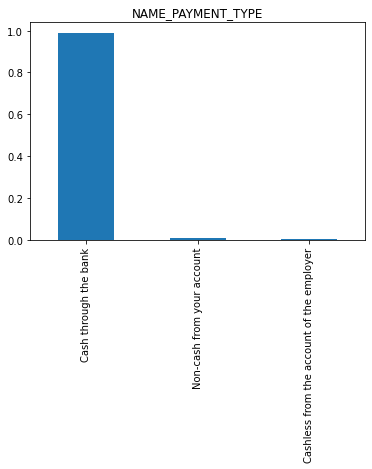

In [319]:
df_combined.NAME_PAYMENT_TYPE.value_counts(normalize=True).plot.bar()
plt.title("NAME_PAYMENT_TYPE")
plt.show()

In [307]:
df_combined.NAME_CLIENT_TYPE.value_counts(normalize=True)

Repeater     0.732643
New          0.184990
Refreshed    0.081265
XNA          0.001102
Name: NAME_CLIENT_TYPE, dtype: float64

Text(0.5, 1.0, 'NAME_CLIENT_TYPE')

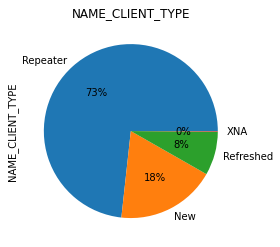

In [317]:
df_combined.NAME_CLIENT_TYPE.value_counts(normalize=True).plot.pie(autopct = "%1.0f%%")
plt.title("NAME_CLIENT_TYPE")

## NAME_CASH_LOAN_PURPOSE

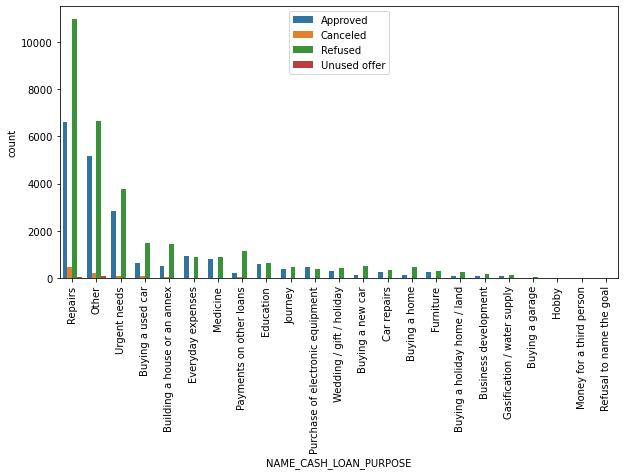

In [284]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_combined, x= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df_combined['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS') 

plt.xticks(rotation=90)
plt.legend()

plt.show()

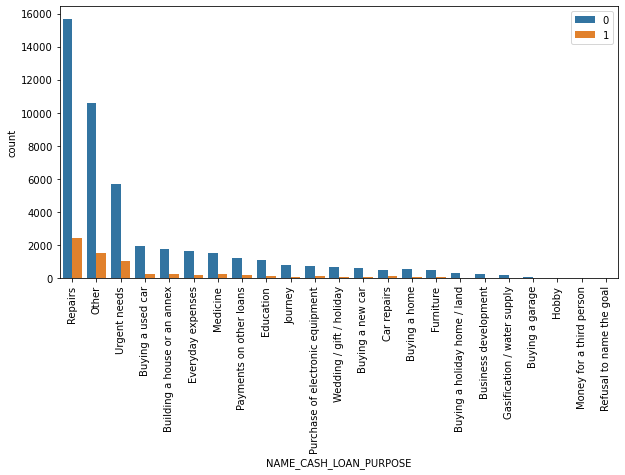

In [316]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_combined, x= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df_combined['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET') 

plt.xticks(rotation=90)
plt.legend()

plt.show()

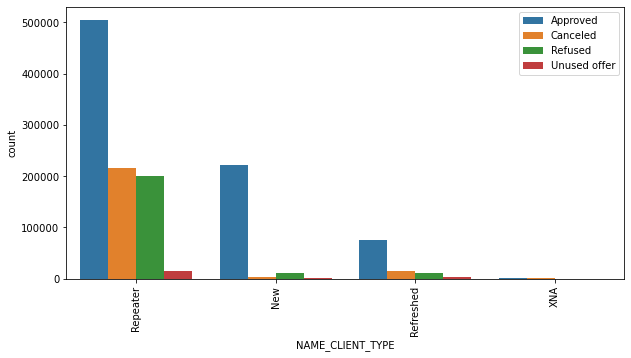

In [313]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_combined, x= 'NAME_CLIENT_TYPE', 
                   order=df_combined['NAME_CLIENT_TYPE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS') 

plt.xticks(rotation=90)
plt.legend()

plt.show()

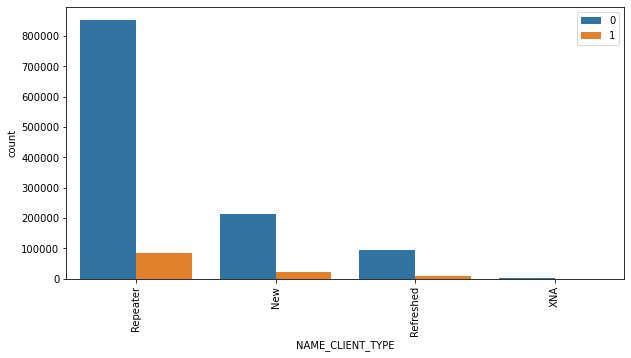

In [314]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_combined, x= 'NAME_CLIENT_TYPE', 
                   order=df_combined['NAME_CLIENT_TYPE'].value_counts().index,hue = 'TARGET') 

plt.xticks(rotation=90)
plt.legend()

plt.show()

In [ ]:
# If we see the clients who are repeaters are tend to refused or defaulter

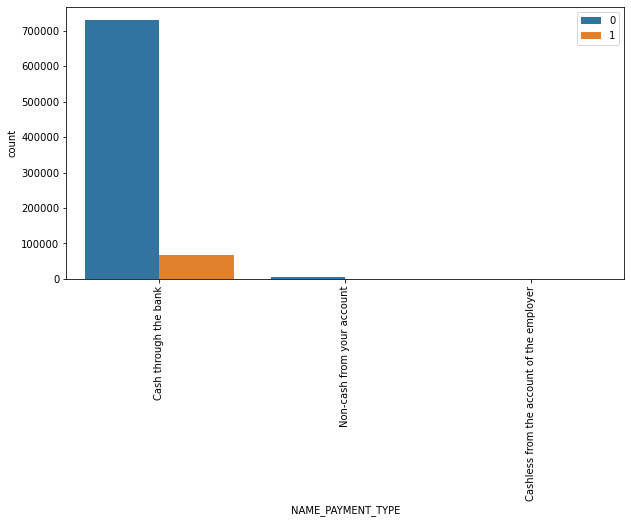

In [321]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_combined, x= 'NAME_PAYMENT_TYPE', 
                   order=df_combined['NAME_PAYMENT_TYPE'].value_counts().index,hue = 'TARGET') 

plt.xticks(rotation=90)
plt.legend()

plt.show()

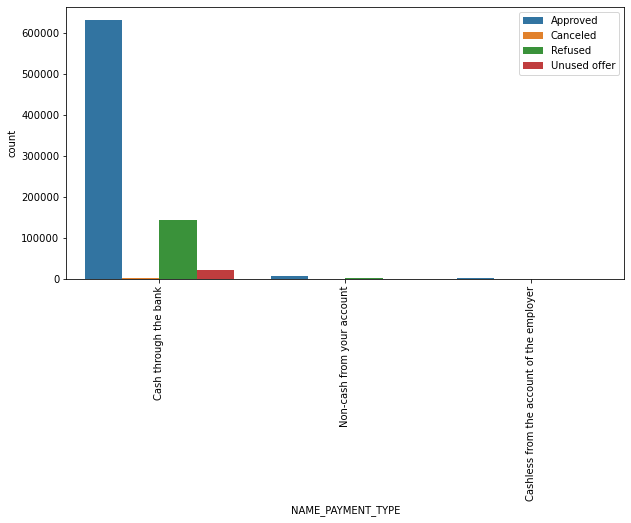

In [322]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_combined, x= 'NAME_PAYMENT_TYPE', 
                   order=df_combined['NAME_PAYMENT_TYPE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS') 

plt.xticks(rotation=90)
plt.legend()

plt.show()

In [ ]:
# from the above observations " cash through banks seems to be more of refused or a defaulter"

### NAME_EDUCATION_TYPE

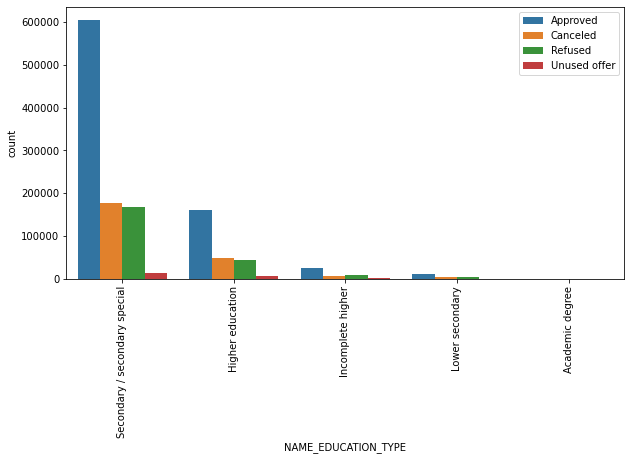

In [286]:


plt.figure(figsize=(10,5))
sns.countplot(data = df_combined, x= 'NAME_EDUCATION_TYPE', 
                   order=df_combined['NAME_EDUCATION_TYPE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS') 

plt.xticks(rotation=90)
plt.legend()

plt.show()

### NAME_HOUSING_TYPE

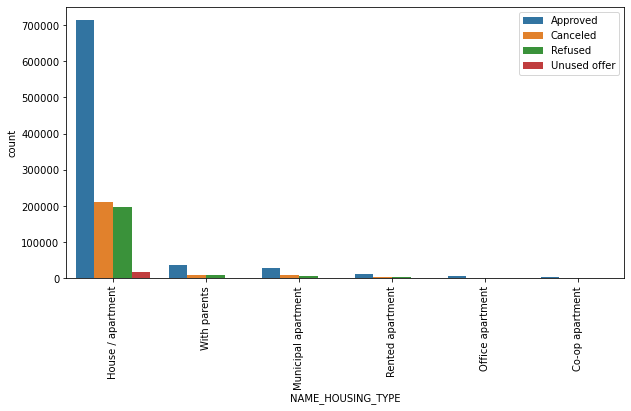

In [287]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_combined, x= 'NAME_HOUSING_TYPE', 
                   order=df_combined['NAME_HOUSING_TYPE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS') 

plt.xticks(rotation=90)
plt.legend()

plt.show()

### NAME_FAMILY_STATUS

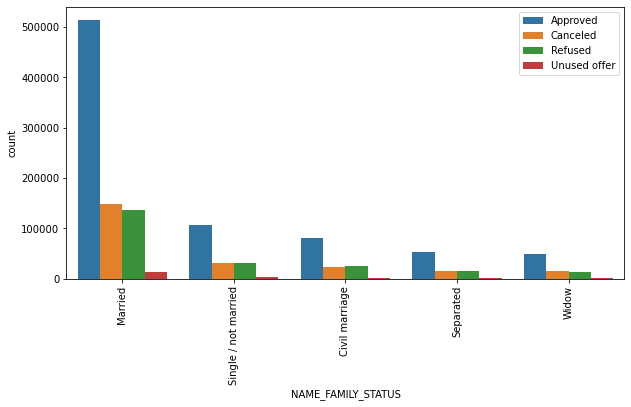

In [288]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_combined, x= 'NAME_FAMILY_STATUS', 
                   order=df_combined['NAME_FAMILY_STATUS'].value_counts().index,hue = 'NAME_CONTRACT_STATUS') 

plt.xticks(rotation=90)
plt.legend()

plt.show()

### Bivariate Analysis

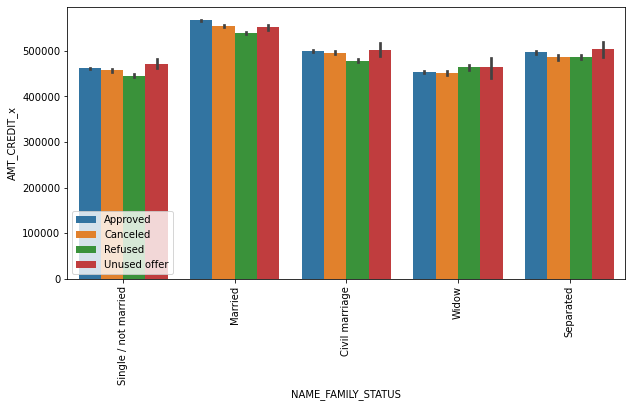

In [290]:
plt.figure(figsize=(10,5))
sns.barplot(data =df_combined,x='NAME_FAMILY_STATUS',y='AMT_CREDIT_x',hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.legend()
plt.show()

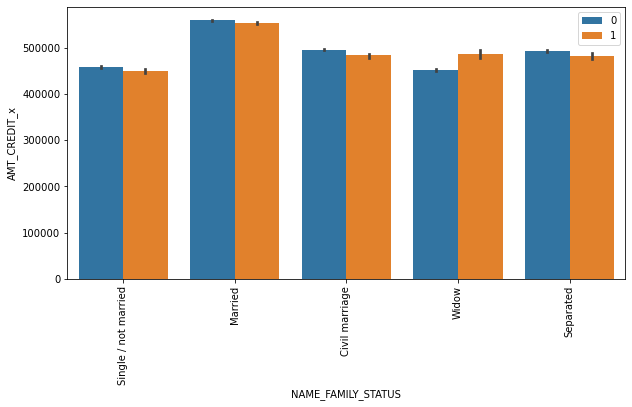

In [291]:
plt.figure(figsize=(10,5))
sns.barplot(data =df_combined,x='NAME_FAMILY_STATUS',y='AMT_CREDIT_x',hue='TARGET')
plt.xticks(rotation=90)
plt.legend()
plt.show()

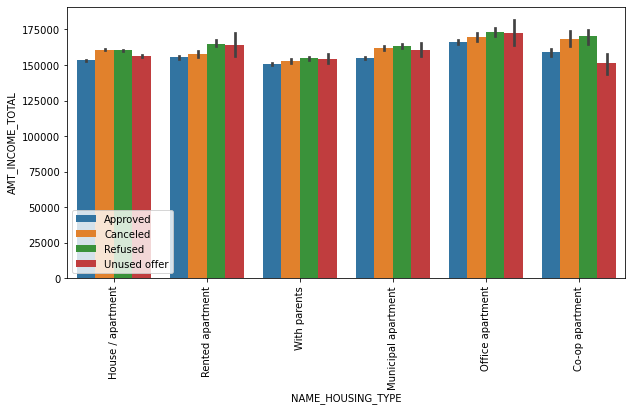

In [292]:
plt.figure(figsize=(10,5))
sns.barplot(data =df_combined,x='NAME_HOUSING_TYPE',y='AMT_INCOME_TOTAL',hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.legend()
plt.show()

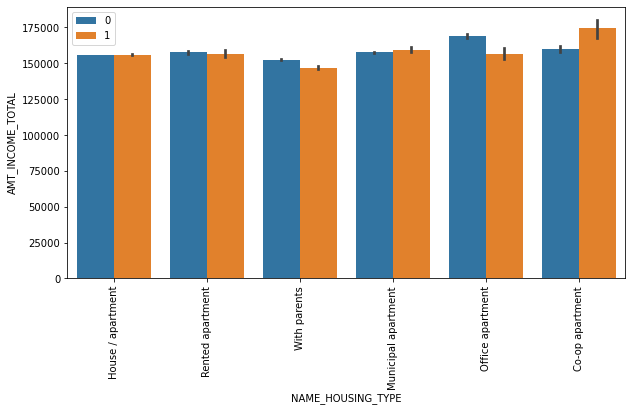

In [294]:
plt.figure(figsize=(10,5))
sns.barplot(data =df_combined,x='NAME_HOUSING_TYPE',y='AMT_INCOME_TOTAL',hue='TARGET')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Final Conclusions

## Primary observations

    - In gender we see that female are more in both cases , in defaulters female percentage is more may be with a little lower in come range comparitevely
    - And clients  with contract type 'cash loans' also seems  tend to be a defaulter, here also income ranges is a littel lower.
    - and considering the occupation - working categeory and educatinal qualification of seconday/secondary special seems to be defaulters

## After combining two data sets

### Considering the loan purposes:
    - reason with repairs seems to fail to repay loan and be a defaulter and the loan application gets rejected
    - so banks/credit companies shoud avoid them
    - Purposes with buying Gararge , Hobby , money for 3rd person seem to be less of a defaulter
    - If we see the Housing type , House/apartments or with parents seems to find no issue in paying loans and less refusal rates
    - at the same time co-aprtment seems to be defaulter so Banks/credit company can avoid them.
    - Seeing the Marital status marries people are more towards defaulters than single/not marries .Banks can also look into this.